In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Import library**

In [ ]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
# import seaborn as sns
# import warnings
# warnings.simplefilter('ignore')
#pandas dan numpy done

**Load data**

In [ ]:
data_location = '1990-2021.csv'
row_data = pd.read_csv(data_location)
row_data.shape

(12, 3)

In [ ]:
#membaca data 5 teratas
row_data.head()

,Date,Indonesia(IDR),Jumlah Pelanggan
0,2010,12663555.0,12093
1,2011,13882342.5,12094
2,2012,15974156.3,12095
3,2013,14658765.0,12096
4,2014,14936310.0,12097


**Membersihkan data yang tidak lengkap (Jika ada)**

In [ ]:
df = row_data.dropna(axis=0)
df.describe()

,Date,Indonesia(IDR),Jumlah Pelanggan
count,12.000000,1.200000e+01,12.000000
mean,2015.500000,1.766894e+07,12098.500000
std,3.605551,4.667285e+06,3.605551
min,2010.000000,1.266356e+07,12093.000000
25%,2012.750000,1.464710e+07,12095.750000
50%,2015.500000,1.570615e+07,12098.500000
75%,2018.250000,1.905114e+07,12101.250000
max,2021.000000,2.652078e+07,12104.000000


In [ ]:
print(df.dtypes)

Date                  int64
Indonesia(IDR)      float64
Jumlah Pelanggan      int64
dtype: object


**Menentukan variabel independen dan dependen**

In [ ]:
#Menentukan varibel independen dari data sehingga, menghapus varibel dependen yaitu harga
x = df.drop(["Indonesia(IDR)"],axis = 1)
x.head()


,Date,Jumlah Pelanggan
0,2010,12093
1,2011,12094
2,2012,12095
3,2013,12096
4,2014,12097


In [ ]:
#Menampilkan data varibel dependen
y = df["Indonesia(IDR)"]
y.head()

0    12663555.0
1    13882342.5
2    15974156.3
3    14658765.0
4    14936310.0
Name: Indonesia(IDR), dtype: float64

**Membagi data untuk training dan validasi**

In [ ]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.2, random_state = 70)

**Membangun model dengan algoritma K-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model  = KNN_Reg(n_neighbors = 1)

#training model
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# test for prediction
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)  

 MSE:  2816661731416.6177 
 Accuracy:  0.8947972740669607


**Menggunakan elbow method untuk menentukan nilai K terbaik**

In [ ]:
def Elbow(K):
  #inisialisasi list kosong
  test_mse =[]

  #train model pada setiap nilai K
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)
  
  return test_mse

**Menampilkan grafik nilai k berdasarkan MSE**

Text(0.5, 1.0, 'Elbow Curve for Test')

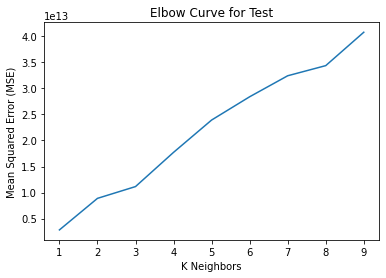

In [ ]:
K = range(1, 10)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

**Melakukan improvisasi dengan menerapkan nilai k yang menghasilkan MSE minimum**

In [ ]:
new_model  = KNN_Reg(n_neighbors = 3)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediction test
print(' Accuracy of new model (%):', acc2*100, '\n',
      'Accuracy of old model (%):', acc1*100, '\n Improvement (%):', (acc2-acc1)*100)

 Accuracy of new model (%): 58.37909731612317 
 Accuracy of old model (%): 89.47972740669607 
 Improvement (%): -31.1006300905729


In [ ]:
data_emas = np.array([[12,2]])
pred_old = model.predict(data_emas)
pred_new = new_model.predict(data_emas)

print(' Hasil Prediksi harga emas dengan old model: Rp', pred_old, 'Juta\n',
      'Hasil Prediksi harga emas dengan new model: Rp', pred_new, 'Juta')

 Hasil Prediksi harga emas dengan old model: Rp [12663555.] Juta
 Hasil Prediksi harga emas dengan new model: Rp [14432158.76666667] Juta


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
